# 데이터셋 출처
   + https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성

   + Pregnancies : 임신 횟수
   + Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
   + BloodPressure : 이완기 혈압 (mm Hg)
   + SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
   + Insulin : 2시간 혈청 인슐린 (mu U / ml)
   + BMI : 체질량 지수 (체중kg / 키(m)^2)
   + DiabetesPedigreeFunction : 당뇨병 혈통 기능
   + Age : 나이
   + Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


# 필요한 라이브러리 로드

In [2]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드

In [5]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

# 학습,예측 데이터 만들기

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_Insulin'],
      dtype='object')

In [20]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
    'Insulin_nan', 'low_glu_Insulin']]
X.shape

(768, 9)

In [21]:
y = df["Outcome"]
y.shape

(768,)

In [22]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

In [28]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [29]:
# test 세트의 문제와 정답을 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

# 학습과 예측하기

In [33]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_Insulin']

# 정답값이자 예측해야 할 값

In [34]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "Outcome"
label_name

'Outcome'

# 학습, 예측 데이터셋 만들기

In [35]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_Insulin
0,0.848324,72,35,33.6,0.468492,50,False,169.5,False
1,-1.123396,66,29,26.6,-0.365061,31,False,102.5,True
2,1.943724,64,0,23.3,0.604397,32,True,169.5,False
3,-0.998208,66,23,28.1,-0.920763,21,False,94.0,True
4,0.504055,40,35,43.1,5.484909,33,False,168.0,False


In [36]:
# 정답 값을 만들어 줍니다, 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [37]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_Insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,102.5,False
616,-0.121888,96,0,28.7,-0.950964,30,False,102.5,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,169.5,False


In [38]:
# 예측의 정답값 예) 실전 시험 문제의 정답

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

# 학습(훈련)
   + 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [40]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 예측
   + 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [41]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

# 트리 알고리즘 분석하기
   + 의사결정나무를 시각화합니다.

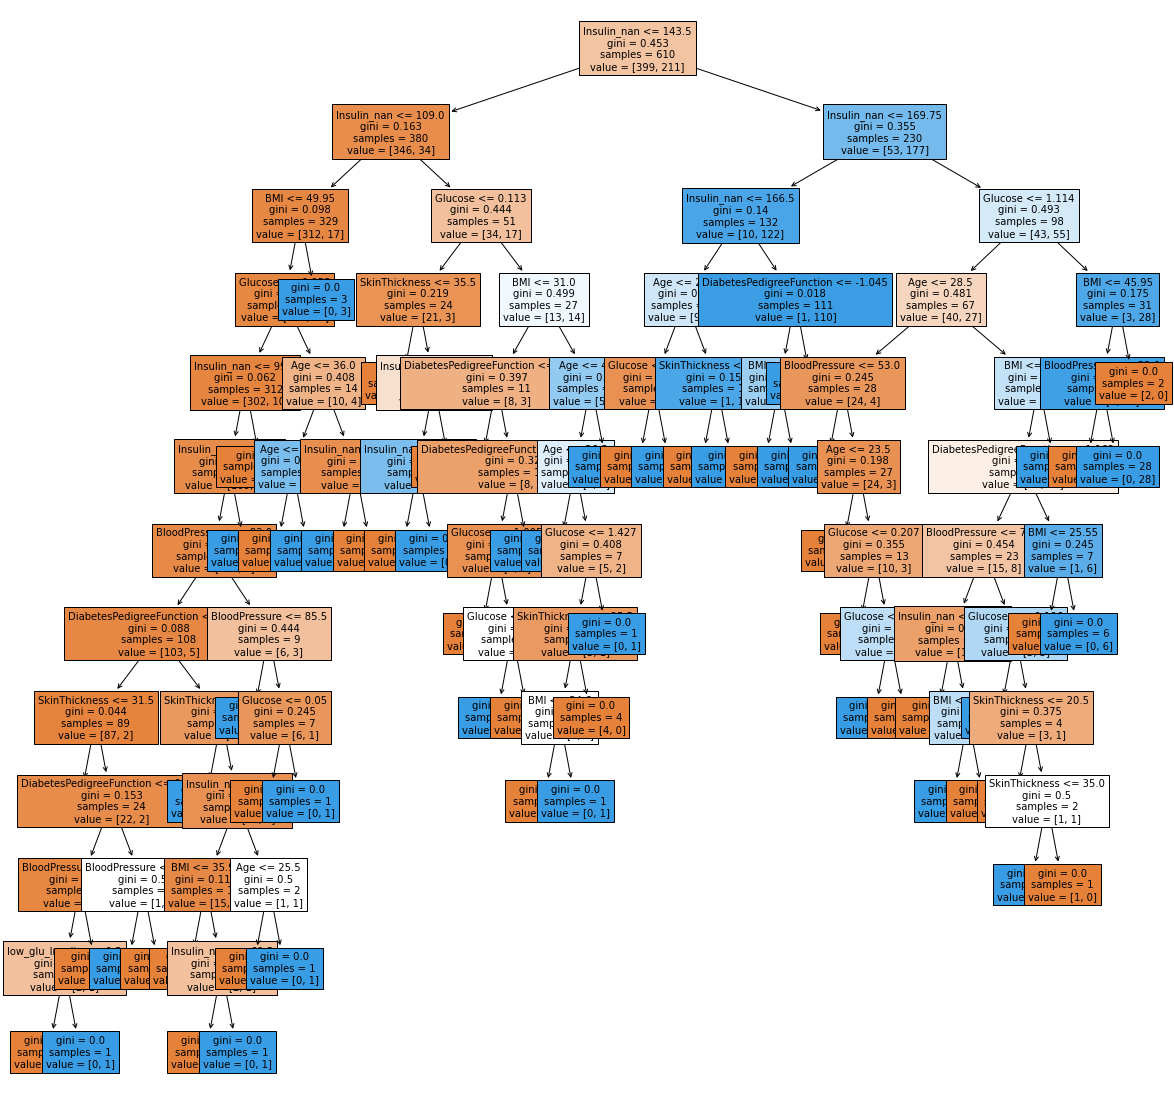

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

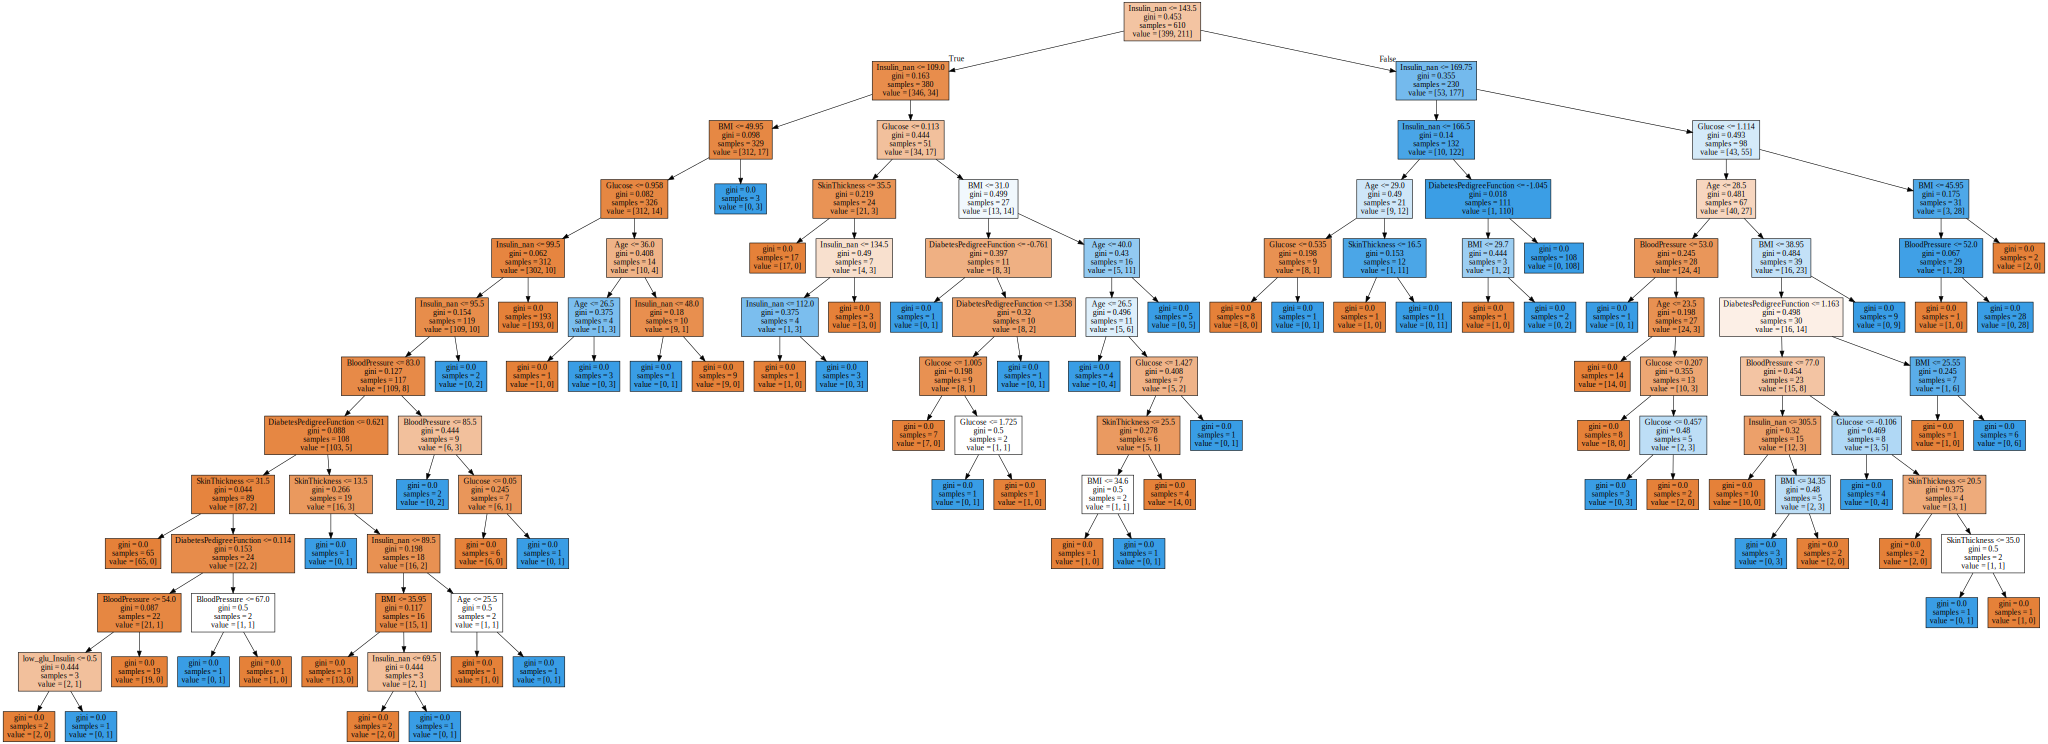

In [43]:
# graphviz 를 통해 시각화합니다.
# graphviz 는 별도의 설치가 필요합니다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해주셔야 합니다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                            feature_names = feature_names,
                            filled=True)
graphviz.Source(dot_tree)

In [44]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.10720708, 0.03829317, 0.02739544, 0.08008031, 0.02662991,
       0.08272508, 0.        , 0.63283861, 0.0048304 ])

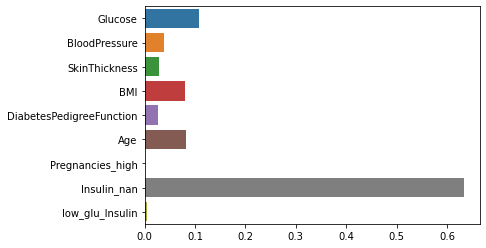

In [45]:
# 피처의 중요도 시각화하기

sns.barplot(x=model.feature_importances_, y = feature_names)

# 정확도(Accuracy)측정하기

In [46]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# 44 => 39(Pregnancies_high) => 49(나이25세 기준) => 55(나이30세 기준)) 
# => 23(인슐린 결측치를 평균으로 대체) => 16(인슐린 결측치를 중앙값으로 대체)
# 15(파생변수 low_glu_insulin 추가)
# => 15(인슐린 수치 600 이상 제거)
# => 15(Glucose, DiabetesPedigreeFunction 스케일링)
diff_count = abs(y_test - y_predict).sum() 
diff_count

15

In [47]:
# 예측의 정확도를 구합니다. 100점 만점에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100

90.25974025974025

In [48]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

90.25974025974025

In [49]:
# model 의 score 로 점수를 계산합니다.

model.score(X_test,y_test)

0.9025974025974026